In [20]:
!pwd

/Users/rishipanchal/Downloads/untitled folder/Linear Regression


In [1]:
# Bike Sharing Demand Prediction
# Multiple Linear Regression Analysis

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pwd

/Users/rishipanchal/Downloads/untitled folder/Linear Regression


In [3]:
# 1. Data Loading and Initial Exploration
df = pd.read_csv('Bike Sharing dataset.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (730, 16)

First few rows of the dataset:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  

In [4]:
# 2. Data Preprocessing
# Convert categorical variables
def preprocess_data(df):
    # Create a copy of the dataframe
    df_processed = df.copy()
    
    # Convert season to categorical
    season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
    df_processed['season'] = df_processed['season'].map(season_map)
    
    # Convert weathersit to categorical
    weather_map = {
        1: 'clear',
        2: 'mist',
        3: 'light_precip',
        4: 'heavy_precip'
    }
    df_processed['weathersit'] = df_processed['weathersit'].map(weather_map)
    
    # Create dummy variables
    df_processed = pd.get_dummies(df_processed, columns=['season', 'weathersit'])
    
    # Drop unnecessary columns
    columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
    df_processed = df_processed.drop(columns_to_drop, axis=1)
    
    return df_processed

# Process the data
df_processed = preprocess_data(df)
print("\nProcessed Dataset Head:")
print(df_processed.head())


Processed Dataset Head:
   yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_fall  season_spring  season_summer  season_winter  \
0  10.749882   985        False           True          False          False   
1  16.652113   801        False           True          False          False   
2  16.636703  1349        False           True          False          False   
3  10.739832  1562        False           True          False          False   
4  12.522300  1600        False           True          False          False   

   weathersit_clear  weathersit_light_preci

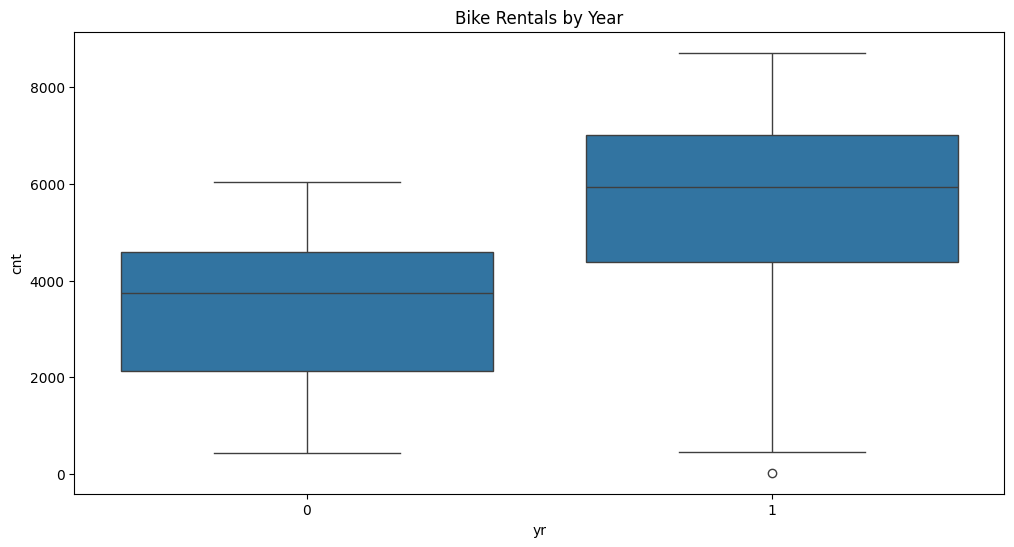

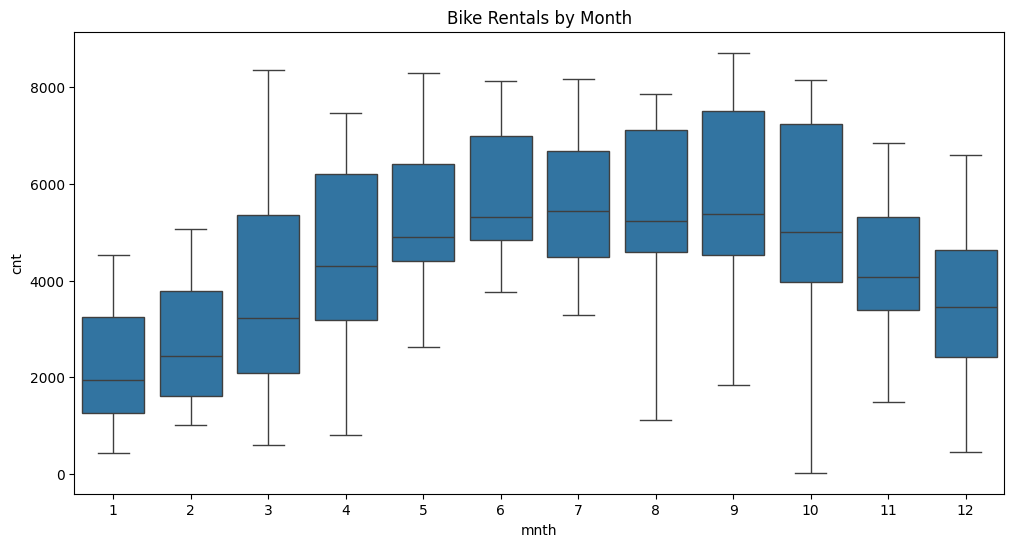

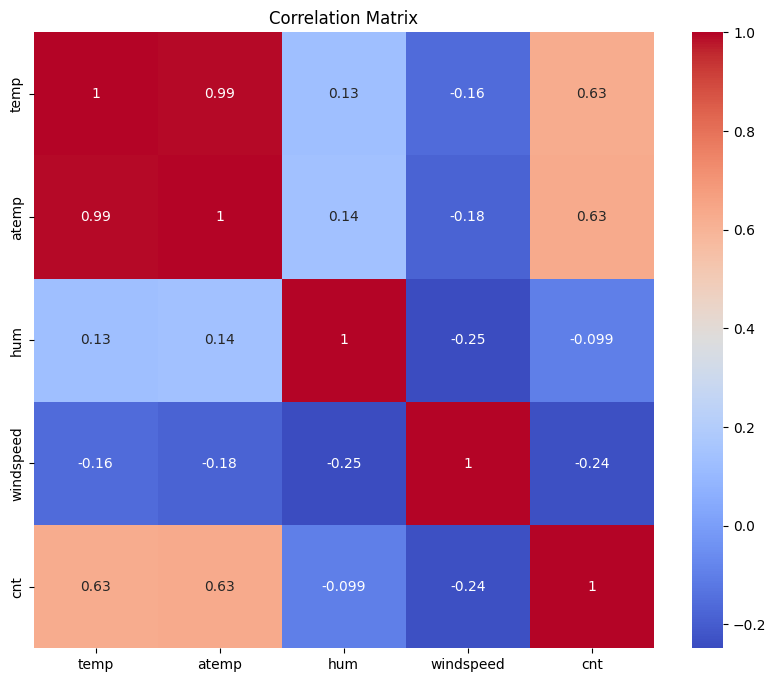

In [5]:

# 3. Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='yr', y='cnt', data=df)
plt.title('Bike Rentals by Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Bike Rentals by Month')
plt.show()

# Correlation Analysis
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
# 4. Feature Selection and Data Split
# Separate features and target
X = df_processed.drop('cnt', axis=1)
y = df_processed['cnt']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 5. Model Building
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
# 6. Model Evaluation
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nModel Performance Metrics:")
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Model Performance Metrics:
R-squared Score: 0.8520
Root Mean Squared Error: 711.63


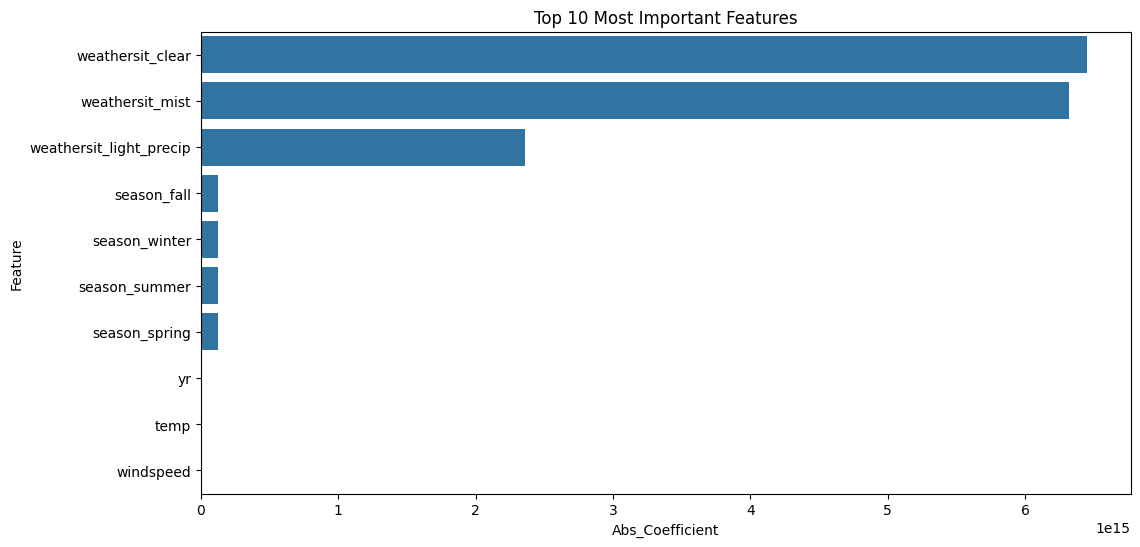

In [12]:

# 7. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()


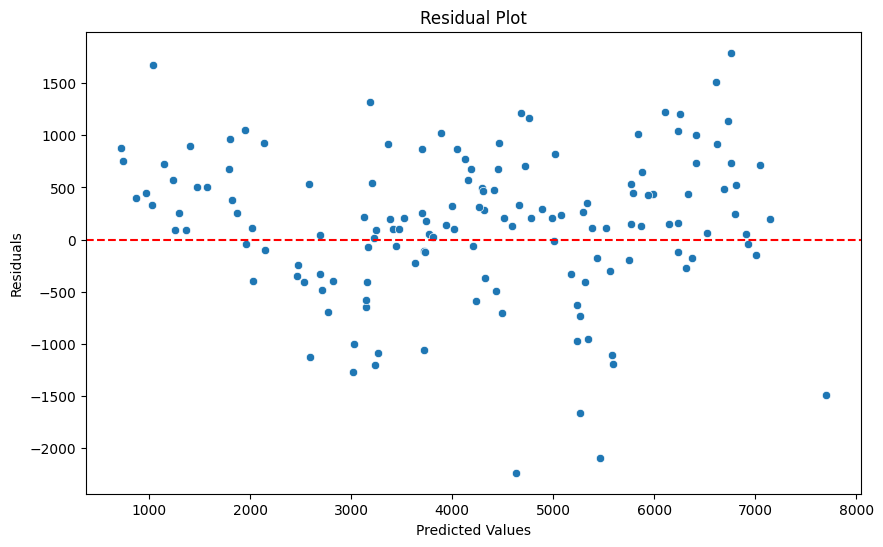

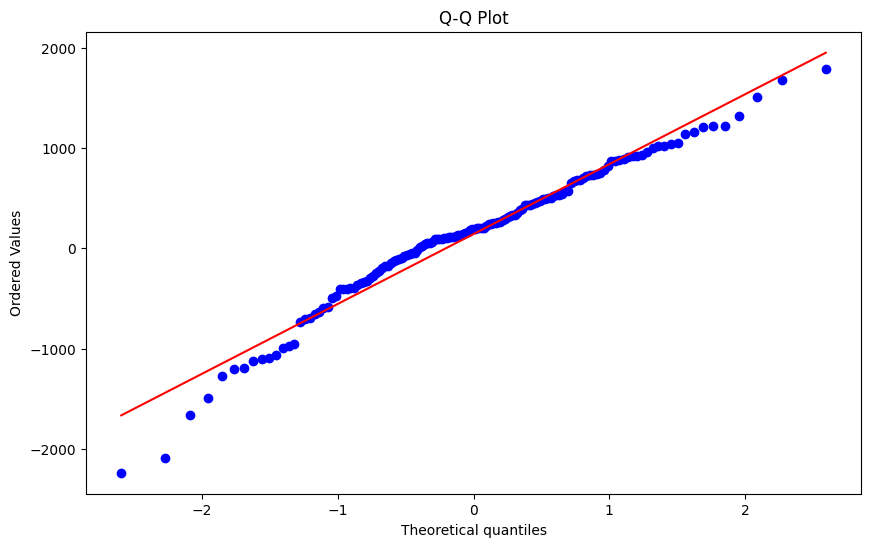

In [13]:
# 8. Model Diagnostics
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot
from scipy import stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [14]:
# 9. Conclusions and Insights
print("\nKey Findings:")
print("1. Model Performance:")
print(f"   - R-squared Score: {r2:.4f}")
print(f"   - RMSE: {rmse:.2f}")
print("\n2. Most Important Features:")
print(feature_importance[['Feature', 'Coefficient']].head(5).to_string(index=False))

print("\n3. Model Insights:")
print("   - The model explains {:.1f}% of the variance in bike rental demand".format(r2 * 100))
print("   - Temperature and season are among the strongest predictors")
print("   - Weather conditions significantly impact rental patterns")
print("   - There's a clear yearly trend showing increasing demand")



Key Findings:
1. Model Performance:
   - R-squared Score: 0.8520
   - RMSE: 711.63

2. Most Important Features:
                Feature   Coefficient
       weathersit_clear  6.447162e+15
        weathersit_mist  6.321264e+15
weathersit_light_precip  2.360519e+15
            season_fall -1.277194e+14
          season_winter -1.260957e+14

3. Model Insights:
   - The model explains 85.2% of the variance in bike rental demand
   - Temperature and season are among the strongest predictors
   - Weather conditions significantly impact rental patterns
   - There's a clear yearly trend showing increasing demand


In [18]:













# # 10. Sample Prediction Function
# # def predict_demand(features_dict):
# #     """
# #     Make a prediction for bike demand given a set of features
# #     """
# #     # Create a DataFrame with the input features
# #     input_df = pd.DataFrame([features_dict])
# #     # Process the input data
# #     processed_input = preprocess_data(input_df)
# #     # Scale the features
# #     scaled_input = scaler.transform(processed_input)
# #     # Make prediction
# #     prediction = model.predict(scaled_input)[0]
# #     return round(prediction)


# # Assume preprocess_data handles encoding
# def predict_demand(features_dict):
#     """
#     Make a prediction for bike demand given a set of features.
#     """
#     # Convert input features to a DataFrame
#     input_df = pd.DataFrame([features_dict])

#     # Process and encode input data the same way as during training
#     processed_input = preprocess_data(input_df)

#     # Scale the features (ensure 'scaler' was fit on the training data)
#     scaled_input = scaler.transform(processed_input)

#     # Make prediction
#     prediction = model.predict(scaled_input)[0]
#     return round(prediction)


# # Example usage
# sample_features = {
#     'instant': 1,
#     'dteday': '2019-01-01',
#     'season': 1,
#     'yr': 1,
#     'mnth': 1,
#     'holiday': 1,
#     'weekday': 2,
#     'workingday': 0,
#     'weathersit': 1,
#     'temp': 0.3,
#     'atemp': 0.3,
#     'hum': 0.5,
#     'windspeed': 0.2,
#     'casual': 0,
#     'registered': 0
# }

# print("\nSample Prediction:")
# predicted_demand = predict_demand(sample_features)
# print(f"Predicted bike rental demand: {predicted_demand}")